<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo21/blob/main/Reto/.Reto1_LimpiezaAn%C3%A1lisisVisualizaci%C3%B3nKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns 


In [132]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:

dfSub = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo21/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', sep=',', encoding='latin-1')

dfSup = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo21/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',sep=',', encoding='latin-1')

In [133]:
dfSub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [134]:
dfSup.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [135]:
dfSub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [136]:
dfSup.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [137]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [138]:
dfSup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [139]:
dfSub.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD         -101.891007
LATITUD            23.163618
PERIODO          2020.000000
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
SDT_mg/L                 NaN
dtype: float64

In [140]:
dfSup.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD                  -100.359969
LATITUD                     21.046992
PERIODO                   2020.000000
TOX_D_48_FON_UT                   NaN
CALIDAD_TOX_D_48_FON              NaN
TOX_FIS_FON_15_UT                 NaN
CALIDAD_TOX_FIS_FON_15            NaN
dtype: float64

Tomaremos las aguas subterraneas sin razón en especial

comenzaremos la limpieza de datos por columnas

In [141]:
#limpiamos
from sklearn.preprocessing import LabelEncoder
 
dfSubLimpio=dfSub

ColumnasOrdinales = ['SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin',
                     'CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
                     'CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']

# Creating a instance of label Encoder.
le = LabelEncoder()
 

In [142]:
# Using .fit_transform function to fit label
# encoder and return encoded label
for k in range(len(ColumnasOrdinales)):

  label = le.fit_transform(dfSubLimpio[ColumnasOrdinales[k]])
  dfSubLimpio[ColumnasOrdinales[k]]=label 


In [143]:
#removemos los < de las columnas y reemplazaremos por 0 por que son valores menores a los que importan
ColumnasCuantitativas=['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                       'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
k=0
for k in range(len(ColumnasCuantitativas)):
  dfSubLimpio[ColumnasCuantitativas[k]]=dfSubLimpio[ColumnasCuantitativas[k]].replace(np.nan, 0) 


In [144]:
dfSubLimpio.describe()

,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,CALIDAD_SDT_ra,...,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
count,1068.000000,1068.000000,1068.000000,1068.0,1064.000000,1068.000000,1062.000000,1068.000000,0.0,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,4.946629,-101.891007,23.163618,2020.0,235.633759,0.673221,1138.953013,2.045880,NaN,1.855805,...,1.128277,3.088015,1.662921,1.647004,0.998127,0.985955,0.999064,0.988764,0.114232,0.127341
std,0.435059,6.703263,3.887670,0.0,116.874291,1.194706,1245.563674,1.874895,NaN,1.186378,...,0.849183,1.420075,0.615827,0.680372,0.043254,0.117731,0.030600,0.105452,0.410800,0.333511
min,0.000000,-116.664250,14.561150,2020.0,26.640000,0.000000,50.400000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-105.388865,20.212055,2020.0,164.000000,0.000000,501.750000,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,5.000000,-102.174180,22.617190,2020.0,215.527500,0.000000,815.000000,2.000000,NaN,2.000000,...,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.000000,-98.974716,25.510285,2020.0,292.710000,1.000000,1322.750000,4.000000,NaN,3.000000,...,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,7.000000,-86.864120,32.677713,2020.0,1650.000000,4.000000,18577.000000,5.000000,NaN,5.000000,...,4.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [145]:
ColumnasCuantitativasMedia=['ALC_mg/L','CONDUCT_mS/cm']

K=0
for k in range(len(ColumnasCuantitativasMedia)):
  dfSubLimpio[ColumnasCuantitativasMedia[k]].fillna(dfSubLimpio[ColumnasCuantitativasMedia[k]].mean(), inplace=True)


In [146]:
#SDT_mg/L no tiene datos, la mandaremos a volar
dfSubLimpio = dfSubLimpio.drop('SDT_mg/L',axis=1)

In [155]:
dfSubLimpio['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [156]:
#no son valores binarios, hay columnas que tienen NO SI y ND (no estoy seguro que ND sea valido o si es un error y debería ser No)
ColumnasBinarias = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin',
                    'CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3',
                    'CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB',
                    'CUMPLE_CON_MN','CUMPLE_CON_FE', 'SEMAFORO']
k=0
for k in range(len(ColumnasBinarias)):

  label = le.fit_transform(dfSubLimpio[ColumnasBinarias[k]])
  dfSubLimpio[ColumnasBinarias[k]]=label 

In [157]:
dfSubLimpio.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

In [158]:
dfSubLimpio.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,5,-102.02210,22.20887,2020,...,2,1,2,1,1,1,1,1,1,1
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,5,-102.20075,21.99958,2020,...,2,1,2,1,1,1,1,1,1,1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,5,-102.28801,22.36685,2020,...,2,1,2,0,1,1,1,1,1,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,5,-102.29449,22.18435,2020,...,2,1,2,1,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,5,-110.24480,23.45138,2020,...,2,1,1,1,1,1,1,1,1,1


In [159]:
dfSubLimpio.describe()

,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068.000000,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,4.946629,-101.891007,23.163618,2020.0,235.633759,0.673221,1138.953013,2.045880,1.855805,0.985019,...,1.786517,0.942884,1.921348,0.881086,0.998127,0.985955,0.999064,0.988764,0.919476,0.872659
std,0.435059,6.703263,3.887670,0.0,116.655014,1.194706,1242.056683,1.874895,1.186378,0.652125,...,0.412238,0.232173,0.272778,0.323839,0.043254,0.117731,0.030600,0.105452,0.272231,0.333511
min,0.000000,-116.664250,14.561150,2020.0,26.640000,0.000000,50.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-105.388865,20.212055,2020.0,164.048750,0.000000,505.500000,0.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,-102.174180,22.617190,2020.0,215.825000,0.000000,822.500000,2.000000,2.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,-98.974716,25.510285,2020.0,292.423750,1.000000,1321.250000,4.000000,3.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,-86.864120,32.677713,2020.0,1650.000000,4.000000,18577.000000,5.000000,5.000000,4.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
dfSubLimpio['SEMAFORO'].value_counts() #con esto se que el 2 es verde, 1 rojo y 0 amarillo

2    434
1    387
0    247
Name: SEMAFORO, dtype: int64

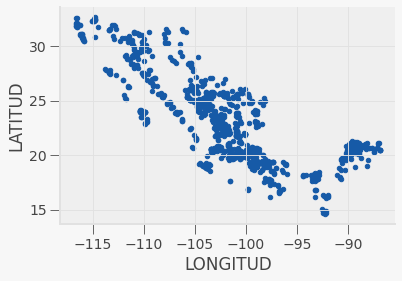

In [128]:

latlong=dfSubLimpio[["LATITUD","LONGITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [81]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
dfSubLimpio["Coordinates"] = list(zip(dfSubLimpio.LONGITUD, dfSubLimpio.LATITUD))
dfSubLimpio["Coordinates"] = dfSubLimpio["Coordinates"].apply(Point)
dfSubLimpio.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,5,-102.02210,22.20887,2020,...,1,2,1,1,1,1,1,1,1,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,5,-102.20075,21.99958,2020,...,1,2,1,1,1,1,1,1,1,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,5,-102.28801,22.36685,2020,...,1,2,0,1,1,1,1,1,1,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,5,-102.29449,22.18435,2020,...,1,2,1,1,1,1,1,1,1,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,5,-110.24480,23.45138,2020,...,1,1,1,1,1,1,1,1,1,POINT (-110.2448 23.45138)


In [83]:
gdf = gpd.GeoDataFrame(dfSubLimpio, geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

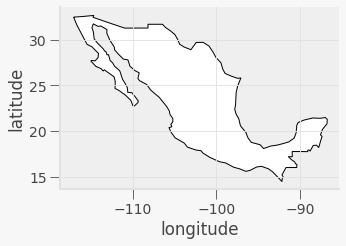

In [84]:
fig, gax = plt.subplots(figsize=(5,5))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

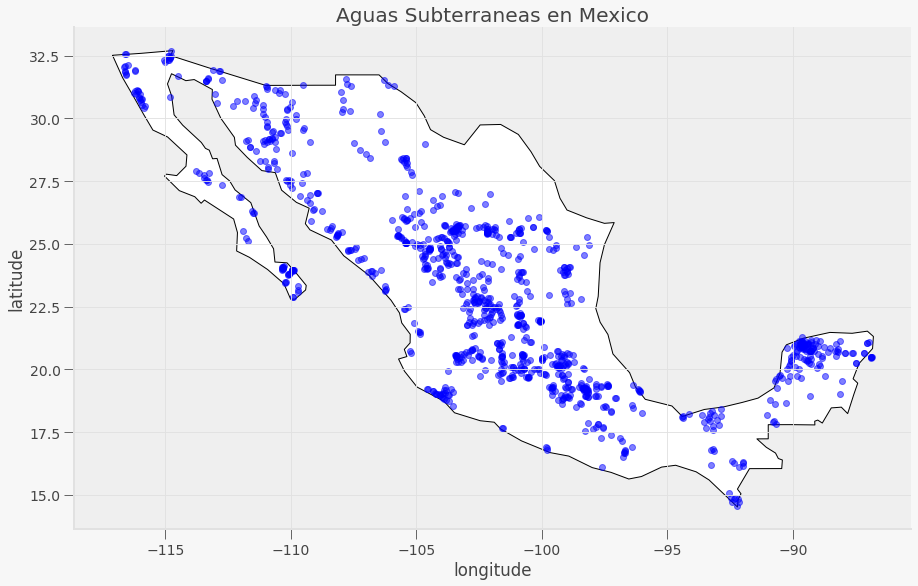

In [85]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(15,15))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [164]:
dfVerdes=dfSubLimpio.loc[dfSubLimpio['SEMAFORO']==2]
latlongV=dfVerdes[["LATITUD","LONGITUD"]]

dfRojos=dfSubLimpio.loc[dfSubLimpio['SEMAFORO']==1]
latlongR=dfRojos[["LATITUD","LONGITUD"]]

dfAmarillos=dfSubLimpio.loc[dfSubLimpio['SEMAFORO']==0]
latlongA=dfAmarillos[["LATITUD","LONGITUD"]]

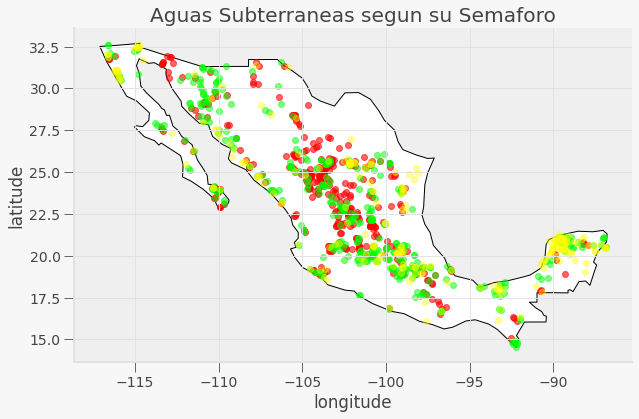

In [178]:
dfV=pd.DataFrame()
dfV["Coordinates"] = list(zip(dfVerdes.LONGITUD, dfVerdes.LATITUD))
dfV["Coordinates"] = dfV["Coordinates"].apply(Point)
gdfV = gpd.GeoDataFrame(dfV, geometry="Coordinates")

dfR=pd.DataFrame()
dfR["Coordinates"] = list(zip(dfRojos.LONGITUD, dfRojos.LATITUD))
dfR["Coordinates"] = dfR["Coordinates"].apply(Point)
gdfR = gpd.GeoDataFrame(dfR, geometry="Coordinates")

dfA=pd.DataFrame()
dfA["Coordinates"] = list(zip(dfAmarillos.LONGITUD, dfAmarillos.LATITUD))
dfA["Coordinates"] = dfA["Coordinates"].apply(Point)
gdfA = gpd.GeoDataFrame(dfA, geometry="Coordinates")



# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.

gdfR.plot(ax=gax, color='Red', alpha = .6)
gdfV.plot(ax=gax, color='Lime', alpha = .5)
gdfA.plot(ax=gax, color='Yellow', alpha = .4)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas segun su Semaforo')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [168]:
kmeans = KMeans(n_clusters=5).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)

[[  24.42279627 -103.03085538]
 [  19.6502625   -90.09271578]
 [  31.00548776 -114.17540267]
 [  27.24963216 -109.36400454]
 [  19.89586823 -100.16301726]]


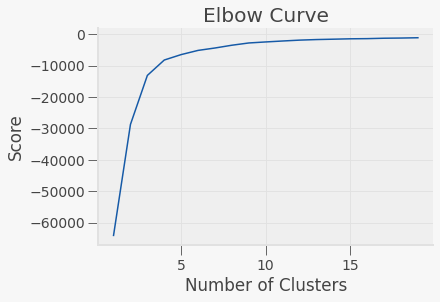

In [169]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [170]:
df2=pd.DataFrame()
df2["Coordinates"] = list(zip(newCoordinates.Longitude, newCoordinates.Latitude))
df2["Coordinates"] = df2["Coordinates"].apply(Point)
df2.head()

,Coordinates
0,POINT (-100.1264737191358 19.825117805555557)
1,POINT (-112.58798516030535 30.31649148091603)
2,POINT (-90.09271577777778 19.6502625)
3,POINT (-102.57873341914191 24.205547376237625)
4,POINT (-107.79199926351352 25.853526891891892)


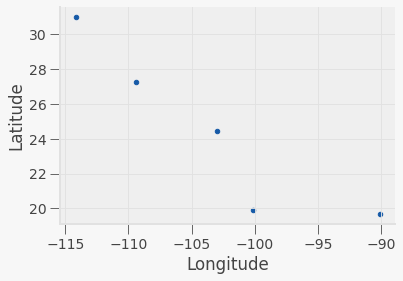

In [171]:
DistLat=centroids[:,0]
DistLong=centroids[:,1]

newCoordinates={'Latitude':DistLat,'Longitude':DistLong}

newCoordinates=pd.DataFrame(newCoordinates)
newCoordinates.plot.scatter( "Longitude","Latitude")

In [172]:
gdf1 = gpd.GeoDataFrame(df2, geometry="Coordinates")

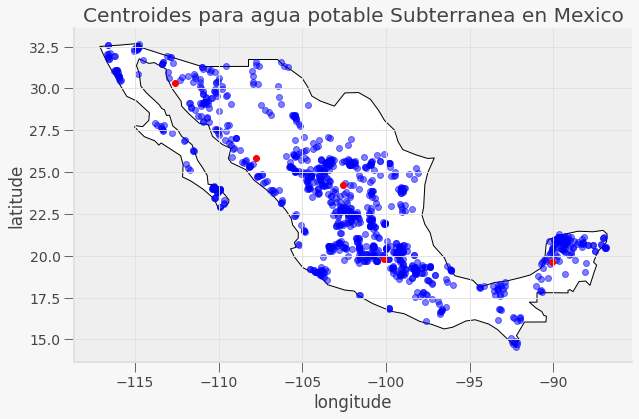

In [174]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5)
gdf1.plot(ax=gax, color='red', alpha = 1)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Centroides para agua potable Subterranea en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()